<a href="https://colab.research.google.com/github/hdtphat/AI_W4_exercise/blob/main/AI_W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#tải fuzzy
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=47ae7a72525e69819a41802b794d566df6080a28182a989659d89415a0735104
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
#thêm thư viện
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt

In [ ]:
############################################## TAM GIÁC ##############################################

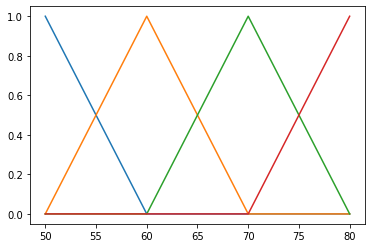

In [16]:
#tạo mảng dữ liệu
a = np.arange(50,81,1)

#tạo các tam giác từ a đến c với đỉnh là b
#cú pháp: fz.trimf(x,[a,b,c])
slow         = fz.trimf(a,[50,50,60])
medium       = fz.trimf(a,[50,60,70])
medium_first = fz.trimf(a,[60,70,80])
full_speed   = fz.trimf(a,[70,80,80])

#in ra màn hình
plt.figure()
plt.plot(a, slow, linewidth = 1.5, label = 'slow')
plt.plot(a, medium, linewidth = 1.5, label = 'medium')
plt.plot(a, medium_first, linewidth = 1.5, label = 'medium_first')
plt.plot(a, full_speed, linewidth = 1.5, label = 'full_speed')


In [ ]:
############################################## HÌNH THANG ##############################################

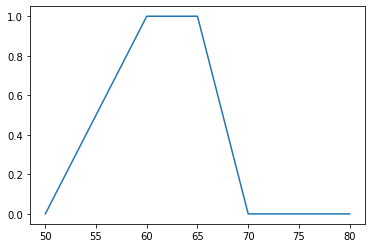

In [18]:
#tạo mảng dữ liệu
a = np.arange(50,81,1)

#tạo các hình thang từ a đến d với 2 điểm trên b,c
#cú pháp: fz.trapmf(<array>,[a,b,c,d])
medium = fz.trapmf(a,[50,60,65,70])

#in ra màn hình
plt.figure()
plt.plot(a, medium, linewidth = 1.5, label = 'medium')

In [ ]:
############################################## PARABOL ##############################################

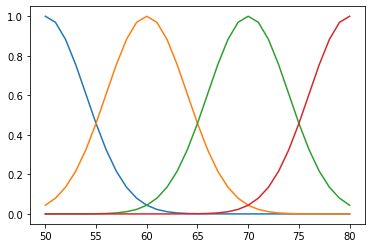

In [22]:
#tạo mảng dữ liệu
a = np.arange(50,81,1)

#tạo các parabol với đỉnh a và phương sai b
#cú pháp: fz.gaussmf(<array>,a,b)
slow         = fz.gaussmf(a,50,4)
medium       = fz.gaussmf(a,60,4)
medium_first = fz.gaussmf(a,70,4)
full_speed   = fz.gaussmf(a,80,4)

#in ra màn hình
plt.figure()
plt.plot(a, slow, linewidth = 1.5, label = 'slow')
plt.plot(a, medium, linewidth = 1.5, label = 'medium')
plt.plot(a, medium_first, linewidth = 1.5, label = 'medium_first')
plt.plot(a, full_speed, linewidth = 1.5, label = 'full_speed')

In [24]:
############################################## TÍNH TIỀN TIP ##############################################

In [61]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

In [62]:
#biến vào
food    = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')

#biến ra
tip = ctrl.Consequent(np.arange(10,31.1),'tip')

In [63]:
#tạo các giá trị cho bảng
food['poor']    = fz.trimf(food.universe, [0,0,5])
food['average'] = fz.trimf(food.universe, [0,6,10])
food['good']    = fz.trimf(food.universe, [5,10,10])

service['poor']    = fz.trimf(service.universe, [0,0,5])
service['average'] = fz.trimf(service.universe, [0,6,10])
service['good']    = fz.trimf(service.universe, [5,10,10])

tip['poor']    = fz.trimf(tip.universe, [10,10,20])
tip['average'] = fz.trimf(tip.universe, [10,20,30])
tip['good']    = fz.trimf(tip.universe, [20,30,30])

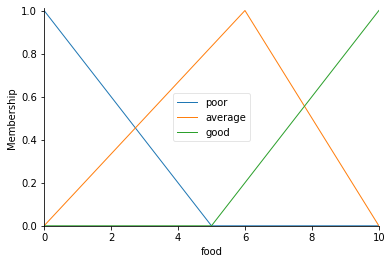

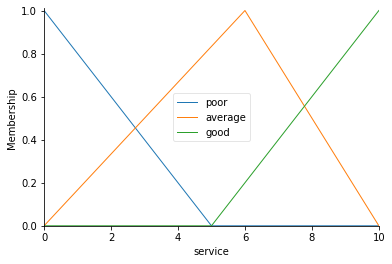

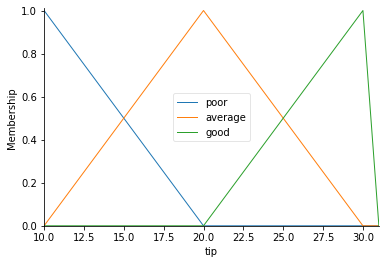

In [50]:
#hien thi bang
food.view()
service.view()
tip.view()

In [75]:
#tao cac rules 
rule_1 = ctrl.Rule(food['poor']& service['poor'],    tip['poor'])
rule_2 = ctrl.Rule(food['poor']& service['average'], tip['poor'])
rule_3 = ctrl.Rule(food['poor']& service['good'],    tip['poor'])

rule_4 = ctrl.Rule(food['average']& service['poor'],    tip['poor'])
rule_5 = ctrl.Rule(food['average']& service['average'], tip['average'])
rule_6 = ctrl.Rule(food['average']& service['good'],    tip['average'])

rule_7 = ctrl.Rule(food['good']& service['poor'],    tip['poor'])
rule_8 = ctrl.Rule(food['good']& service['average'], tip['average'])
rule_9 = ctrl.Rule(food['good']& service['good'],    tip['good'])

19.782945736434108


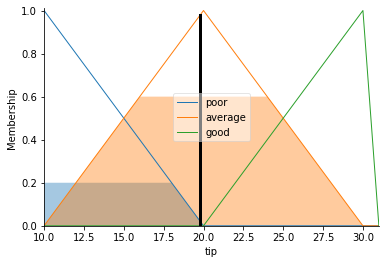

In [76]:
#day may hoc
tipping_calc = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_calc)

#cho input dau vao
tipping.input['food'] = 4
tipping.input['service'] = 8

#tinh toan
tipping.compute()

#hien thi ket qua
print(tipping.output['tip'])
tip.view(sim = tipping)

In [ ]:
############################################## EXERCISE: NỒI CƠM ##############################################

49.99999999999999


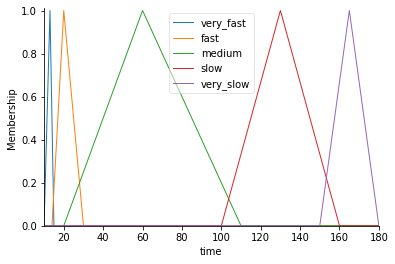

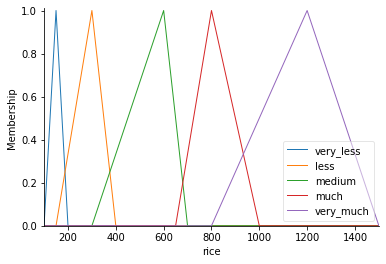

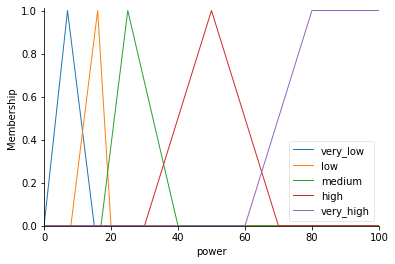

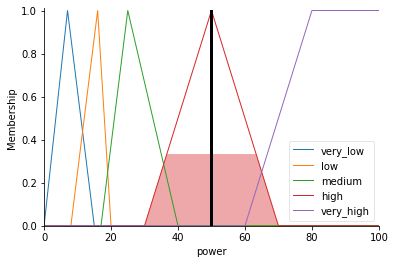

In [98]:
#them thư viện
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt

#biến vào
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')

#biến ra
power= ctrl.Consequent(np.arange(0,101,1),'power')

#tạo các giá trị cho bảng
time['very_fast'] = fz.trimf(time.universe, [10,13,15])
time['fast']      = fz.trimf(time.universe, [14,20,30])
time['medium']    = fz.trimf(time.universe, [20,60,110])
time['slow']      = fz.trimf(time.universe, [100,130,160])
time['very_slow'] = fz.trimf(time.universe, [150,165,180])
time.view()

rice['very_less'] = fz.trimf(rice.universe, [100,150,200])
rice['less']      = fz.trimf(rice.universe, [150,300,400])
rice['medium']    = fz.trimf(rice.universe, [300,600,700])
rice['much']      = fz.trimf(rice.universe, [650,800,1000])
rice['very_much'] = fz.trimf(rice.universe, [800,1200,1500])
rice.view()

power['very_low']  = fz.trimf(power.universe, [0,7,15])
power['low']       = fz.trimf(power.universe, [8,16,20])
power['medium']    = fz.trimf(power.universe, [17,25,40])
power['high']      = fz.trimf(power.universe, [30,50,70])
power['very_high'] = fz.trapmf(power.universe, [60,80,100,100])
power.view()

#tạo các rules 
rule_1 = ctrl.Rule(time['very_slow']& rice['very_less'], power['very_low'])
rule_2 = ctrl.Rule(time['very_slow']& rice['less'],      power['very_low'])
rule_3 = ctrl.Rule(time['very_slow']& rice['medium'],    power['low'])
rule_4 = ctrl.Rule(time['very_slow']& rice['much'],      power['medium'])
rule_5 = ctrl.Rule(time['very_slow']& rice['very_much'], power['high'])

rule_6  = ctrl.Rule(time['slow']& rice['very_less'], power['very_low'])
rule_7  = ctrl.Rule(time['slow']& rice['less'],      power['low'])
rule_8  = ctrl.Rule(time['slow']& rice['medium'],    power['low'])
rule_9  = ctrl.Rule(time['slow']& rice['much'],      power['medium'])
rule_10 = ctrl.Rule(time['slow']& rice['very_much'], power['medium'])

rule_11 = ctrl.Rule(time['medium']& rice['very_less'], power['low'])
rule_12 = ctrl.Rule(time['medium']& rice['less'],      power['low'])
rule_13 = ctrl.Rule(time['medium']& rice['medium'],    power['medium'])
rule_14 = ctrl.Rule(time['medium']& rice['much'],      power['high'])
rule_15 = ctrl.Rule(time['medium']& rice['very_much'], power['very_high'])

rule_16 = ctrl.Rule(time['fast']& rice['very_less'], power['low'])
rule_17 = ctrl.Rule(time['fast']& rice['less'],      power['low'])
rule_18 = ctrl.Rule(time['fast']& rice['medium'],    power['medium'])
rule_19 = ctrl.Rule(time['fast']& rice['much'],      power['high'])
rule_20 = ctrl.Rule(time['fast']& rice['very_much'], power['high'])

rule_21 = ctrl.Rule(time['very_fast']& rice['very_less'], power['medium'])
rule_22 = ctrl.Rule(time['very_fast']& rice['less'],      power['medium'])
rule_23 = ctrl.Rule(time['very_fast']& rice['medium'],    power['high'])
rule_24 = ctrl.Rule(time['very_fast']& rice['much'],      power['very_high'])
rule_25 = ctrl.Rule(time['very_fast']& rice['very_much'], power['very_high'])

#day may hoc
powering_calc = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10, rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19, rule_20, rule_21, rule_22, rule_23, rule_24, rule_25])
powering = ctrl.ControlSystemSimulation(powering_calc)

#cho input dau vao
powering.input['time'] = 80
powering.input['rice'] = 700

#tinh toan
powering.compute()

#hien thi ket qua
print(powering.output['power'])

power.view(sim = powering)